# **Cracking the Market Code with AI-Driven Stock Price Prediction Using Time Series Analysis**

## 📁 1. Uploading the Dataset

In [21]:
from google.colab import files
uploaded = files.upload()

Saving apple_stock_data.csv to apple_stock_data (1).csv


# 📊 2. Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📄 3. Loading the Dataset

In [23]:
import pandas as pd

# Read the dataset
df = pd.read_csv("apple_stock_data.csv")

# 🔍 4. Exploring the Dataset

In [24]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (100, 7)


In [25]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [26]:
# Display first few rows
print(df.head())

         Date  Open  High   Low  Close  Adj Close     Volume
0  2020-01-02  74.0  75.0  73.0   74.5       74.3  100000000
1  2020-01-03  74.1  75.1  73.1   74.6       74.4  100100000
2  2020-01-04  74.2  75.2  73.2   74.7       74.5  100200000
3  2020-01-05  74.3  75.3  73.3   74.8       74.6  100300000
4  2020-01-06  74.4  75.4  73.4   74.9       74.7  100400000


In [27]:
# Data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [28]:
# Summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,78.950000,79.950000,77.950000,79.450000,79.250000,1.049500e+08
std,2.901149,2.901149,2.901149,2.901149,2.901149,2.901149e+06
min,74.000000,75.000000,73.000000,74.500000,74.300000,1.000000e+08
25%,76.475000,77.475000,75.475000,76.975000,76.775000,1.024750e+08
50%,78.950000,79.950000,77.950000,79.450000,79.250000,1.049500e+08
75%,81.425000,82.425000,80.425000,81.925000,81.725000,1.074250e+08
max,83.900000,84.900000,82.900000,84.400000,84.200000,1.099000e+08


# 🧹 5. Data Preprocessing

Before Preprocessing

In [29]:
# Before preprocessing: check shape and sample data
print("Before preprocessing:")
print("Shape:", df.shape)
print(df.head())


Before preprocessing:
Shape: (100, 7)
         Date  Open  High   Low  Close  Adj Close     Volume
0  2020-01-02  74.0  75.0  73.0   74.5       74.3  100000000
1  2020-01-03  74.1  75.1  73.1   74.6       74.4  100100000
2  2020-01-04  74.2  75.2  73.2   74.7       74.5  100200000
3  2020-01-05  74.3  75.3  73.3   74.8       74.6  100300000
4  2020-01-06  74.4  75.4  73.4   74.9       74.7  100400000


Handling Missing Values

In [30]:
# Check for missing values
print("Before")
print(df.isnull().sum())

# Handle missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Verify if all missing values are handled
print("After")
print(df.isnull().sum())

Before
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
After
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-30-acac3c4cf392>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Handling Duplicates

In [31]:
# Check for duplicate rows
print(f"Duplicate rows before removal: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify removal
print(f"Duplicate rows after removal: {df.duplicated().sum()}")


Duplicate rows before removal: 0
Duplicate rows after removal: 0


Encoding Categorical Variables

In [32]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

IQR Method

In [33]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to the 'Close' price column
df = remove_outliers_iqr(df, 'Close')


Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop('Close', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Close'] = df['Close'].values


In [35]:
# Initialize the scaler#
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the 'Close' column
df['Close_scaled'] = scaler.fit_transform(df[['Close']])


After Preprocessing

In [36]:
# +Code
# After preprocessing: check shape and sample data
print("After preprocessing:")
print("Shape:", df.shape)
print(df.head())


After preprocessing:
Shape: (100, 106)
   Open  High   Low  Close  Adj Close     Volume  Date_2020-01-03  \
0  74.0  75.0  73.0   74.5       74.3  100000000            False   
1  74.1  75.1  73.1   74.6       74.4  100100000             True   
2  74.2  75.2  73.2   74.7       74.5  100200000            False   
3  74.3  75.3  73.3   74.8       74.6  100300000            False   
4  74.4  75.4  73.4   74.9       74.7  100400000            False   

   Date_2020-01-04  Date_2020-01-05  Date_2020-01-06  ...  Date_2020-04-02  \
0            False            False            False  ...            False   
1            False            False            False  ...            False   
2             True            False            False  ...            False   
3            False             True            False  ...            False   
4            False            False             True  ...            False   

   Date_2020-04-03  Date_2020-04-04  Date_2020-04-05  Date_2020-04-06  \
0   

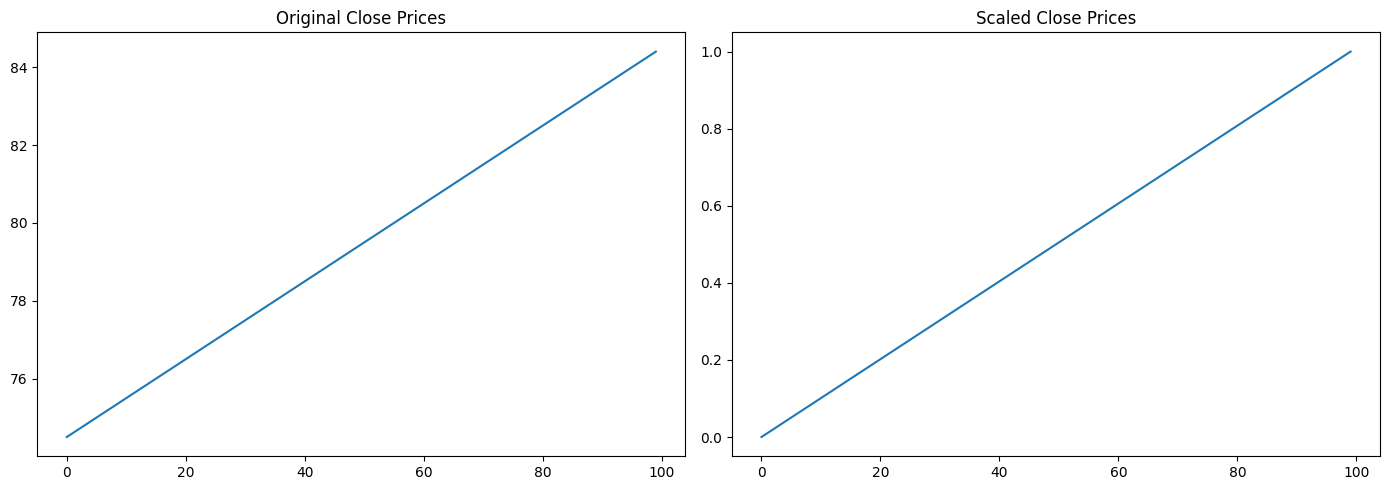

In [37]:
# Plot original 'Close' prices#
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Close'])
plt.title('Original Close Prices')

# Plot scaled 'Close' prices
plt.subplot(1, 2, 2)
plt.plot(df['Close_scaled'])
plt.title('Scaled Close Prices')

plt.tight_layout()
plt.show()


# 📈 6. Data Visualization

Box Plot

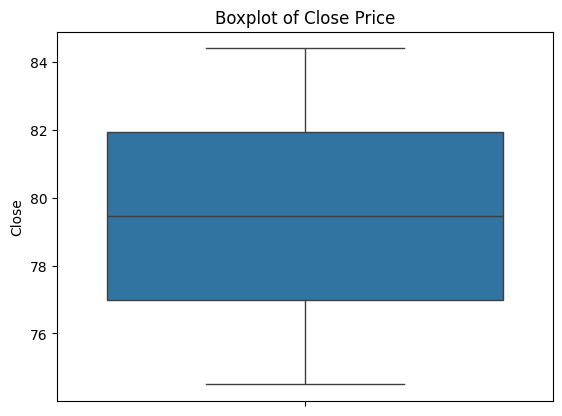

In [38]:
# Boxplot of 'Close' column
sns.boxplot(y=df['Close'])
plt.title('Boxplot of Close Price')
plt.show()

Histogram

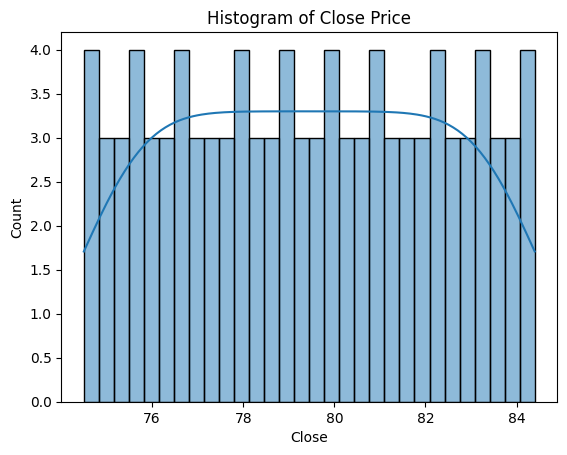

In [39]:
# Histogram of 'Close' column
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Histogram of Close Price')
plt.show()


Correlation Heatmap

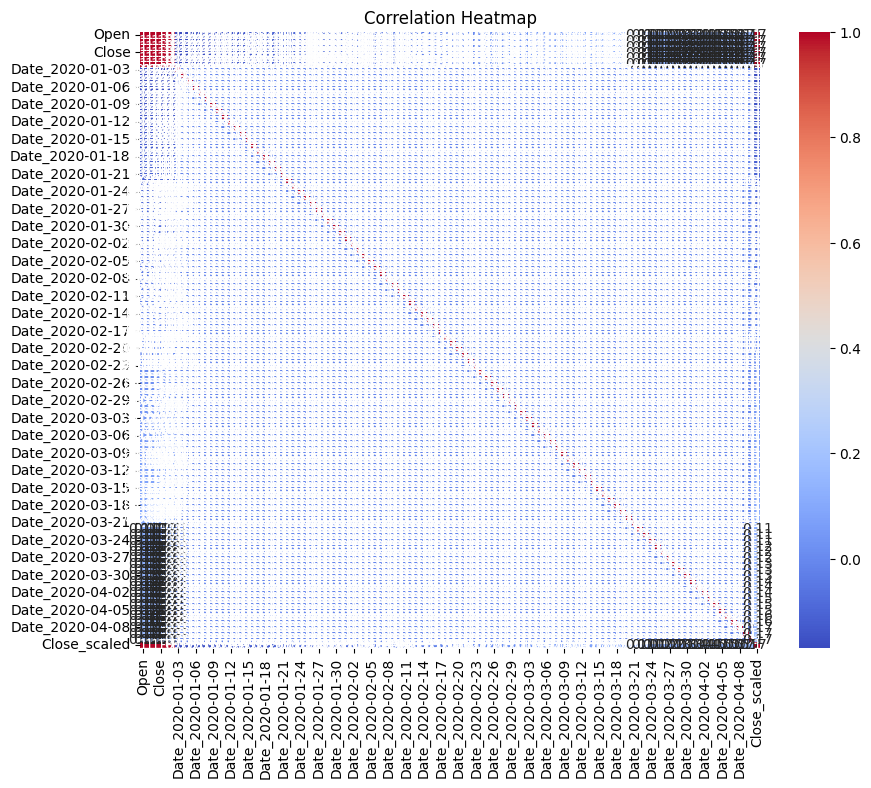

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Count Plot

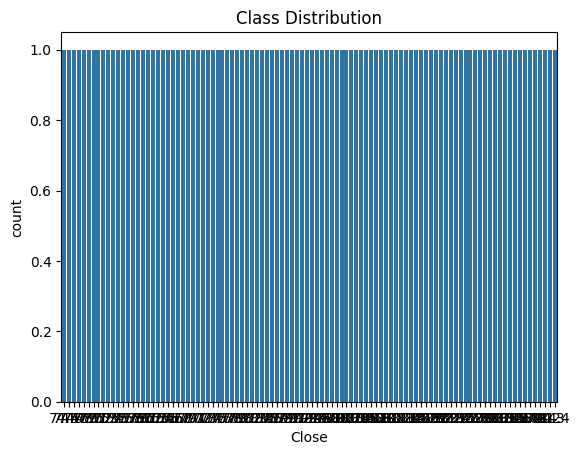

In [41]:
sns.countplot(x='Close', data=df)
plt.title('Class Distribution')
plt.show()

Scatter Plot

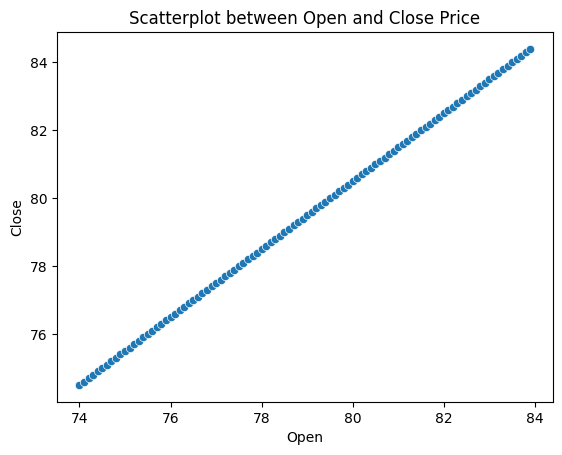

In [42]:
# Scatterplot between 'Open' and 'Close'
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Scatterplot between Open and Close Price')
plt.show()

# 🧠 7. Model Building

Identify Target and Features

In [44]:
# Define target and features
target = 'Close'
features = df.columns.drop(target)

print("Features:", features)

Features: Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Date_2020-01-03',
       'Date_2020-01-04', 'Date_2020-01-05', 'Date_2020-01-06',
       'Date_2020-01-07',
       ...
       'Date_2020-04-02', 'Date_2020-04-03', 'Date_2020-04-04',
       'Date_2020-04-05', 'Date_2020-04-06', 'Date_2020-04-07',
       'Date_2020-04-08', 'Date_2020-04-09', 'Date_2020-04-10',
       'Close_scaled'],
      dtype='object', length=105)


Convert Categorical Columns to Numerical

In [45]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: []


In [46]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(target, axis=1))
y = df_encoded[target]

Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Building

In [49]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# 📊 8. Model Evaluation

In [56]:
# +Code
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model (LinearRegression in this case)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 3.552713678800501e-15
Mean Squared Error (MSE): 5.048709793414476e-29
Root Mean Squared Error (RMSE): 7.105427357601002e-15
R² Score: 1.0


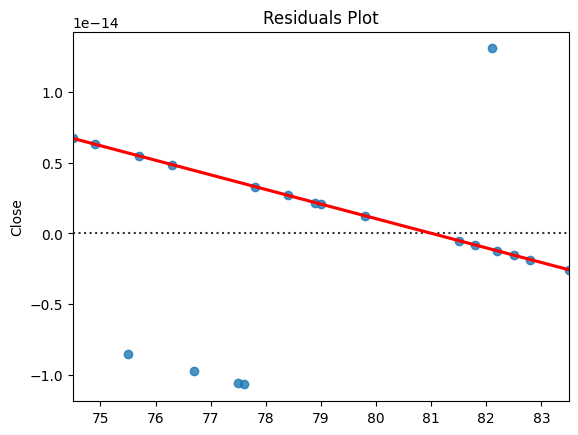

In [57]:
# +Code
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.show()


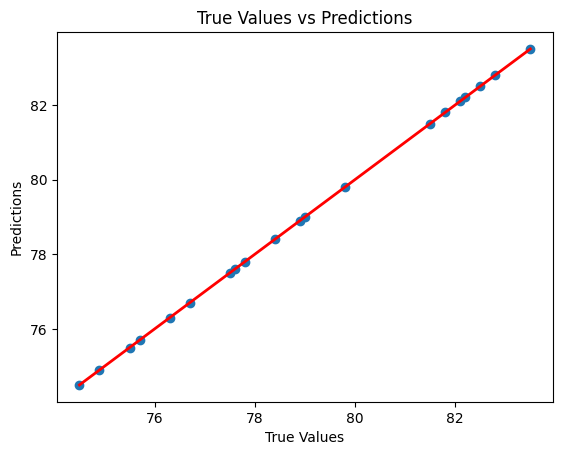

In [58]:
# +Code
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()
